<a href="https://colab.research.google.com/github/acubillosunal/UBM-MACHINE-LEARNING-1/blob/main/11-Manejando%20datos%20categ%C3%B3ricos%20en%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-MACHINE-LEARNING-1/main/init.py
import init; init.init(force_download=False); 

In [2]:
from IPython.display import Image

# **Manejando datos categóricos en Machine Learning**

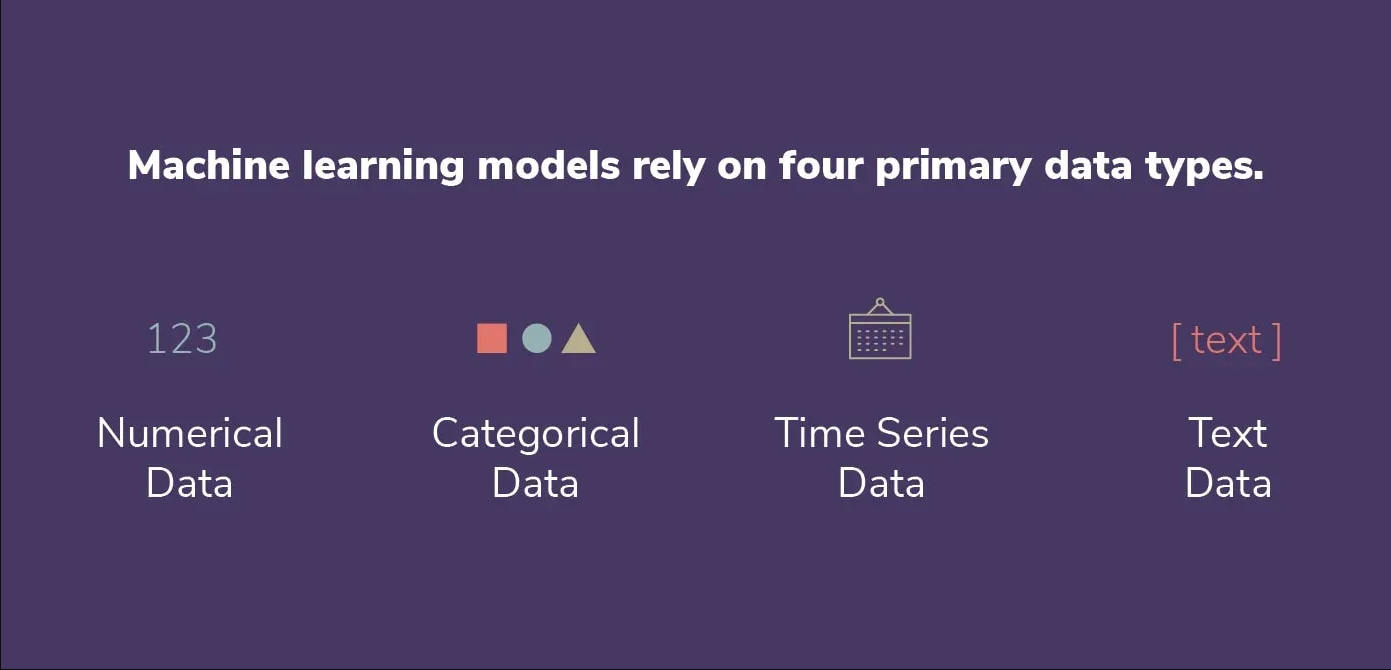

In [3]:
Image("local/imgs/types_data_ML.png", width = 1000, height = 600)

### **Introducción**

Los datos que se pueden categorizar pero que carecen de una jerarquía u orden inherente se conocen como datos categóricos. En otras palabras, no existe ninguna conexión matemática entre las categorías. El sexo de una persona (hombre/mujer), el color de ojos (azul, verde, marrón, etc.), el tipo de vehículo que conduce (sedán, todoterreno, camioneta, etc.) o el tipo de fruta que consume (manzana, plátano, naranja, etc.) son ejemplos de datos categóricos.

En este tutorial, describiremos los métodos de manejo y preprocesamiento de datos categóricos. Antes de analizar la importancia de preparar datos categóricos para modelos de aprendizaje automático, primero definiremos los datos categóricos y sus tipos. Además, veremos varios métodos de codificación, métodos de visualización y análisis de datos categóricos en Python, e ideas más avanzadas como datos categóricos de gran cardinalidad y varios métodos de codificación.

### **Conjuntos de Datos Categóricos**

La información se representa utilizando dos formas diferentes de datos: datos categóricos y datos numéricos. Los datos que pueden clasificarse o agruparse se denominan datos categóricos. Los hombres y las mujeres entran en la categoría de género, los colores rojo, verde y azul entran en la categoría de colores y la categoría de países puede incluir EE. UU., Canadá, México, etc.

Los datos numéricos se refieren a datos que se pueden expresar como un número. Ejemplos de datos numéricos incluyen altura, peso y temperatura.

En términos simples, los datos categóricos son información que se puede clasificar en categorías, mientras que los datos numéricos son información que se puede expresar como un número. Dado que la mayoría de los algoritmos de aprendizaje automático se crean para operar con datos numéricos, los datos categóricos se manejan de manera diferente a los numéricos. datos en este campo. Antes de que los datos categóricos puedan utilizarse como entrada para un modelo de aprendizaje automático, primero deben transformarse en datos numéricos. Este proceso de convertir datos categóricos en representación numérica se conoce como codificación.

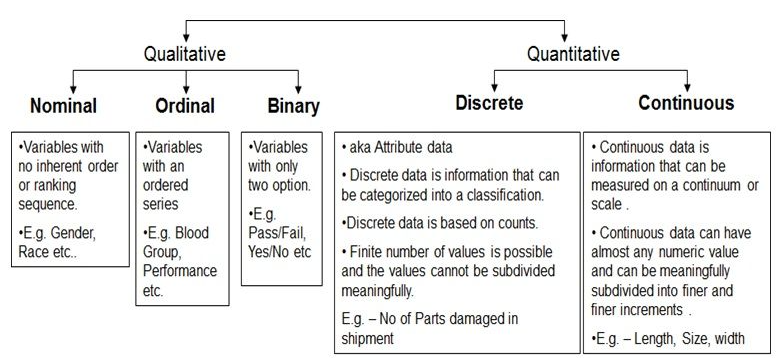

In [4]:
Image("local/imgs/types_data.png", width = 1000, height = 600)

Hay dos tipos de datos categóricos: nominales y ordinales.

**Datos nominales**

Los datos nominales son datos categóricos que pueden dividirse en grupos, pero estos grupos carecen de jerarquía u orden intrínseco. Ejemplos de datos nominales incluyen nombres de marcas (Coca-Cola, Pepsi, Sprite), variedades de aderezos para pizza (pepperoni, champiñones, cebollas) y color de cabello (rubio, castaño, negro, etc.).

**Datos ordinales**

Los datos ordinales, por otro lado, describen información que se puede categorizar y tiene un orden o clasificación distinta. Niveles de educación (secundaria, licenciatura, maestría), niveles de satisfacción laboral (extremadamente satisfecho, satisfecho, neutral, insatisfecho, muy insatisfecho) y calificaciones de estrellas (1 estrella, 2 estrellas, 3 estrellas, 4 estrellas, 5 estrellas) son algunos ejemplos de datos ordinales.

Al darle a cada categoría un valor numérico que refleje su orden o clasificación, los datos ordinales pueden transformarse en datos numéricos y utilizarse en el aprendizaje automático. Para algoritmos que son sensibles al tamaño de los datos de entrada, esto puede resultar útil.

La distinción entre datos nominales y ordinales no siempre es obvia en la práctica y puede variar según el caso de uso particular. Por ejemplo, mientras que algunas personas pueden ver la "calificación de estrellas" como datos ordinales, otras pueden verla como datos nominales. Lo más importante es ser consciente de la naturaleza de sus datos y seleccionar la estrategia de codificación que mejor capture las relaciones en sus datos.

**Comprender los tipos de datos en pandas**

La biblioteca pandas de código abierto de Python, ampliamente utilizada, se utiliza para el análisis y la manipulación de datos. Tiene sólidas capacidades para manejar datos estructurados, incluso como marcos de datos y series que pueden manejar datos tabulares con filas y columnas etiquetadas.

pandas también proporciona varias funciones para leer y escribir diferentes tipos de archivos (csv, parquet, bases de datos, etc.). Cuando lees un archivo usando pandas, a cada columna se le asigna un tipo de datos según la inferencia. Aquí están todos los tipos de datos que los pandas pueden asignar:

1. **Numérico**: Esto incluye números enteros y de punto flotante. Los datos numéricos se utilizan normalmente para análisis cuantitativos y operaciones matemáticas.
2. **Cadena**: este tipo de datos se utiliza para representar datos textuales como nombres, direcciones y descripciones.
3. **Booleano**: Este tipo de datos sólo puede tener dos valores posibles: Verdadero o Falso. Los datos booleanos se utilizan a menudo para operaciones lógicas y filtrado.
4. **Fecha y hora**: este tipo de datos se utiliza para representar fechas y horas. pandas tiene poderosas herramientas para manipular datos de fecha y hora.
5. **Categórico**: este tipo de datos representa datos que adoptan un número limitado de valores. Los datos categóricos se utilizan a menudo para agrupar y agregar datos.
6. **Objeto**: este tipo de datos es un comodín para datos que no encajan en las otras categorías. Puede incluir una variedad de tipos de datos diferentes, como listas, diccionarios y otros objetos.

Los datos que no encajan en otros tipos de datos, incluidas cadenas, tipos mixtos u otros objetos, se representan mediante los tipos de datos de categoría y objeto en pandas. Sin embargo, tienen algunas distinciones importantes que tienen un impacto en su funcionamiento y desempeño.

**Tipo de datos categóricos**
El tipo de datos categórico se creó para información que solo tiene unos pocos valores posibles, como categorías o etiquetas. Internamente, los datos categóricos se representan como una colección de números, lo que puede acelerar algunas operaciones y conservar memoria en comparación con el tipo de datos del objeto correspondiente. Además, los datos categóricos se pueden organizar de forma lógica y facilitan procedimientos eficaces de agrupación y agregación.

**Tipo de datos de objeto**
Por otro lado, el tipo de datos de objeto sirve como un cajón de sastre para información que no encaja en los otros tipos de datos. Listas, diccionarios y otros objetos son sólo algunos ejemplos de los diversos tipos de datos que puede incluir. Aunque los datos de objetos tienen una gran flexibilidad, también pueden ser más lentos y consumir más memoria que los datos categóricos del mismo tamaño y no pueden estar sujetos a algunas de las operaciones especializadas que son posibles con los datos de categorías.

En general, es posible que desee pensar en utilizar el tipo de datos categóricos si sus datos tienen una pequeña cantidad de valores posibles y tiene la intención de realizar muchas agrupaciones o agregaciones. El tipo de datos del objeto suele ser una opción segura en todos los demás casos. Sin embargo, el tipo de datos ideal depende en última instancia de su caso de uso único y de las propiedades de sus datos.

In [5]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
from unidecode import unidecode

In [6]:
df = pd.read_csv('local/data/diamond.csv')
df.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


¿Puedes identificar cuáles de estas columnas son categóricas o numéricas? Bueno, todas las columnas en este ejemplo son categóricas excepto "Peso en quilates" y "Precio". Veamos si estamos en lo cierto al verificar los tipos de datos predeterminados.

In [7]:
df.dtypes

Carat Weight    float64
Cut              object
Color            object
Clarity          object
Polish           object
Symmetry         object
Report           object
Price             int64
dtype: object

Observa cómo a `Price` se le asigna el tipo `int64`, a `Carat Weight` como `float64` y el resto de las columnas son objetos, exactamente como esperábamos.

### **Análisis de características categóricas**

Hay algunas funciones en pandas, que le permiten analizar rápidamente tipos de datos categóricos en su conjunto de datos. Examinémoslos uno por uno:

El comando `value_counts()` es una función en la biblioteca pandas que devuelve la frecuencia de cada valor único en una columna de datos categóricos. Esta función es útil cuando desea obtener una comprensión rápida de la distribución de una variable categórica, como las categorías más comunes y su frecuencia.

In [8]:
df['Cut'].value_counts()

Ideal              2482
Very Good          2428
Good                708
Signature-Ideal     253
Fair                129
Name: Cut, dtype: int64

Si deseas visualizar la distribución, puede utilizar la biblioteca `plotly` para dibujar un diagrama de barras interactivo.

In [9]:
import plotly.express as px
cut_counts = df['Cut'].value_counts()
fig = px.bar(x=cut_counts.index, y=cut_counts.values)
fig.show()

### **Group by**

`groupby()` es una función en Pandas que le permite agrupar datos por una o más columnas y aplicar funciones agregadas como suma, media y recuento. Esta función es útil cuando desea realizar análisis más complejos en datos categóricos, como calcular el promedio de una variable numérica para cada categoría. Veamos un ejemplo:

In [10]:
df.groupby(by = 'Cut').mean()

/tmp/ipykernel_187447/4240247309.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Carat Weight,Price
Cut,,
Fair,1.058682,5886.178295
Good,1.268927,9326.656780
Ideal,1.382293,13127.331185
Signature-Ideal,1.205217,11541.525692
Very Good,1.332941,11484.696870


Solo devolverá un marco de datos con columnas numéricas únicamente. El parámetro `by` dentro del método `groupby` define la columna en la que desea realizar la operación agrupar por, y luego `mean()` fuera de paréntesis es el método de agregación.

La salida se puede interpretar como que el precio medio de un diamante con talla justa es de 5.886, y el peso medio es de 1,05 frente al precio medio de 11.485 de un diamante con talla Muy Buena.

### **Tabulación cruzada**

`crosstab()` es una función en pandas que crea una tabla de tabulación cruzada, que muestra la distribución de frecuencia de dos o más variables categóricas. Esta función es útil cuando desea ver la relación entre dos o más variables categóricas, como por ejemplo cómo se relaciona la frecuencia de una variable con otra variable.

In [11]:
pd.crosstab(index=df['Cut'], columns=df['Color'])

Color,D,E,F,G,H,I
Cut,,,,,,
Fair,12,32,24,21,24,16
Good,74,110,133,148,128,115
Ideal,280,278,363,690,458,413
Signature-Ideal,30,35,38,64,45,41
Very Good,265,323,455,578,424,383


El resultado de la función de tabla cruzada en pandas es una tabla que muestra la distribución de frecuencia de dos o más variables categóricas. Cada fila de la tabla representa una categoría única en una de las variables y cada columna representa una categoría única en la otra variable. Las entradas de la tabla son los recuentos de frecuencia de las combinaciones de categorías en las dos variables.

### **Tabla dinámica**

`pivot_table()` es una función en Pandas que crea tablas dinámicas, que son similares a las tablas de tabulación cruzada pero con más flexibilidad. Esta función es útil cuando desea analizar múltiples variables categóricas y su relación con una o más variables numéricas. Las tablas dinámicas le permiten agregar datos de múltiples formas y mostrar los resultados en una forma compacta.

In [12]:
pd.pivot_table(df, values='Price', index='Cut', columns='Color', aggfunc=np.mean)

Color,D,E,F,G,H,I
Cut,,,,,,
Fair,6058.250000,5370.625000,6063.625000,7345.523810,5908.500000,4573.187500
Good,10058.716216,8969.545455,9274.007519,9988.614865,9535.132812,8174.113043
Ideal,18461.953571,12647.107914,14729.426997,13570.310145,11527.700873,9459.588378
Signature-Ideal,19823.100000,11261.914286,13247.947368,10248.296875,9112.688889,8823.463415
Very Good,13218.826415,12101.910217,12413.905495,12354.013841,10056.106132,8930.031332


Esta tabla muestra el precio medio de cada talla de diamante para cada color. Las filas representan los diferentes cortes de diamantes, las columnas representan los diferentes colores de diamantes y las entradas de la tabla son el precio promedio del diamante.

La función pivot_table es útil cuando desea resumir y comparar los datos numéricos de múltiples variables en un formato de tabla. La función le permite agregar los datos utilizando varias funciones (como media, suma, recuento, etc.) y organizarlos en un formato que sea fácil de leer y analizar.

### **Codificación de características categóricas en Python**

Por lo general, los datos categóricos no pueden ser manejados directamente por algoritmos de aprendizaje automático, ya que la mayoría de los algoritmos están diseñados principalmente para operar únicamente con datos numéricos. Por lo tanto, antes de que las características categóricas puedan usarse como entradas para algoritmos de aprendizaje automático, deben codificarse como valores numéricos.

Existen varias técnicas para codificar características categóricas, incluida la codificación one-hot, la codificación ordinal y la codificación de destino. La elección de la técnica de codificación depende de las características específicas de los datos y de los requisitos del algoritmo de aprendizaje automático que se utiliza.

### **One-Hot Encoding**

One-Hot Encoding es un proceso de representación de datos categóricos como un conjunto de valores binarios, donde cada categoría se asigna a un valor binario único. En esta representación, sólo un bit se establece en 1 y el resto se establece en 0, de ahí el nombre "uno activo". Esto se usa comúnmente en el aprendizaje automático para convertir datos categóricos a un formato que los algoritmos puedan procesar.

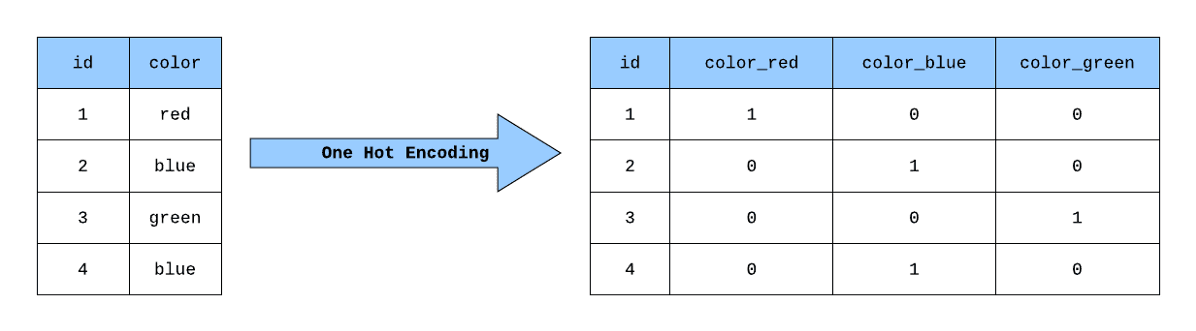

In [13]:
Image("local/imgs/One_Hot_Encoding.png", width = 1400, height = 900)

**pandas categóricos a numéricos**

Una forma de lograr esto en pandas es mediante el método `pd.get_dummies()`. Es una función en la biblioteca Pandas que se puede usar para realizar codificación one-hot en variables categóricas en un DataFrame. Toma un DataFrame y devuelve un nuevo DataFrame con columnas binarias para cada categoría. A continuación se muestra un ejemplo de cómo utilizarlo:

Supongamos que tenemos un marco de datos con una columna "fruta" que contiene datos categóricos:

In [14]:
data = {
    "fruit": ["apple", "banana", "orange", "apple"]
}

# show head
df = pd.DataFrame(data)
df.head()

,fruit
0,apple
1,banana
2,orange
3,apple


In [15]:
df_encoded = pd.get_dummies(df["fruit"])
df_encoded .head()

,apple,banana,orange
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


Aunque `pandas.get_dummies` es sencillo de usar, un enfoque más común es usar `OneHotEncoder` de la biblioteca sklearn, especialmente cuando realiza tareas de aprendizaje automático. La principal diferencia es que `pandas.get_dummies` no puede aprender codificaciones; solo puede realizar una codificación en caliente en el conjunto de datos que pasa como entrada. Por otro lado, `sklearn.OneHotEncoder` es una clase que se puede guardar y utilizar para transformar otros conjuntos de datos entrantes en el futuro.

In [16]:
data = {
    "fruit": ["apple", "banana", "orange", "apple"]
}

# one-hot-encode using sklearn
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoded_results = encoder.fit_transform(df).toarray()
encoded_results

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

### **Label Encoding**

La codificación de etiquetas es una técnica para codificar variables categóricas como valores numéricos, asignando a cada categoría un número entero único. Por ejemplo, supongamos que tenemos una variable categórica "color" con tres categorías: "rojo", "verde" y "azul". Podemos codificar estas categorías usando la codificación de etiquetas de la siguiente manera (rojo: 0, verde: 1, azul: 2).

La codificación de etiquetas puede ser útil para algunos algoritmos de aprendizaje automático que requieren entradas numéricas, ya que permite representar datos categóricos de una manera que los algoritmos puedan entender. Sin embargo, es importante tener en cuenta que la codificación de etiquetas introduce un orden arbitrario de las categorías, que puede no reflejar necesariamente ninguna relación significativa entre ellas. En algunos casos, esto puede generar problemas en el análisis, especialmente si se interpreta que el orden tiene algún tipo de relación ordinal.

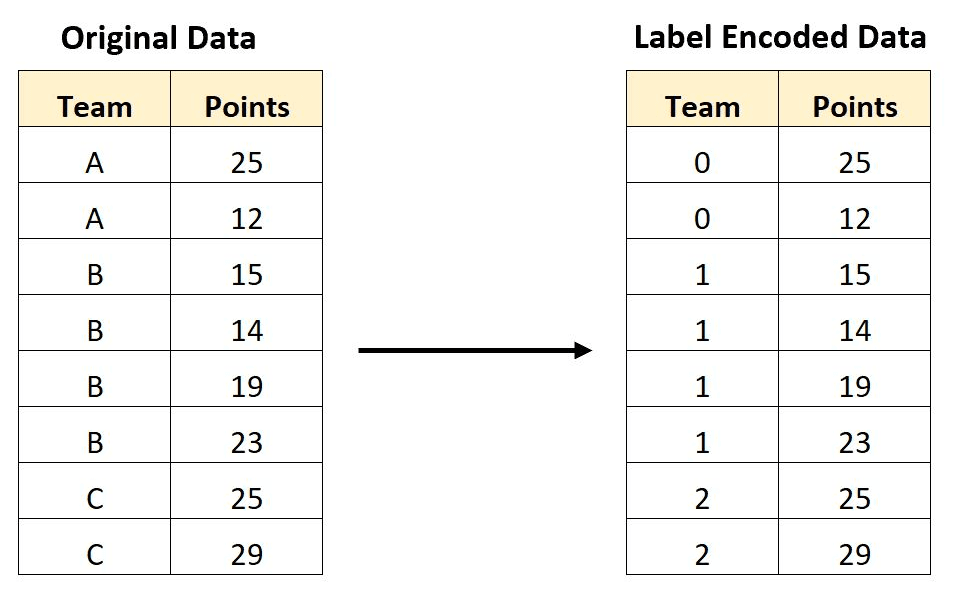

In [17]:
Image("local/imgs/label_encoding.png", width = 1200, height = 800)

### **Comparación One-Hot y Label Encoding**

La codificación one-hot y la codificación label de etiquetas son técnicas para codificar variables categóricas como valores numéricos, pero tienen propiedades diferentes y son apropiadas para diferentes casos de uso.

La codificación one-hot representa cada categoría como una columna binaria, donde un 1 indica la presencia de la categoría y un 0 indica su ausencia. Por ejemplo, supongamos que tenemos una variable categórica "color" con tres categorías: "rojo", "verde" y "azul". La codificación one-hot representaría esta variable como tres columnas binarias:

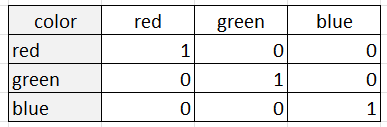

In [18]:
Image("local/imgs/One_Hot_Comparasion.png", width = 800, height = 500)

La codificación one-hot es apropiada cuando las categorías no tienen un orden o relación intrínseca entre sí. Esto se debe a que la codificación one-hot trata cada categoría como una entidad separada sin relación con las otras categorías. La codificación one-hot también es útil cuando el número de categorías es relativamente pequeño, ya que el número de columnas puede resultar difícil de manejar para un número muy grande de categorías.

La codificación de etiquetas, por otro lado, representa cada categoría como un número entero único. Por ejemplo, la variable "color" con tres categorías podría codificarse como etiqueta como:

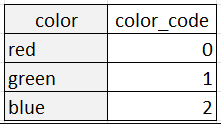

In [19]:
Image("local/imgs/label_encoding_comparasion.png", width = 700, height = 400)

La codificación de etiquetas es apropiada cuando las categorías tienen un orden o relación natural entre sí, como en el caso de variables ordinales como "pequeña", "mediana" y "grande". En estos casos, los valores enteros asignados a las categorías deben reflejar el orden de las categorías. La codificación de etiquetas también puede resultar útil cuando el número de categorías es muy grande, ya que reduce la dimensionalidad de los datos.

En general, la codificación one-hot se usa más comúnmente en aplicaciones de aprendizaje automático, ya que es más flexible y evita los problemas de ambigüedad y ordenamiento arbitrario que pueden surgir con la codificación de etiquetas. Sin embargo, la codificación de etiquetas puede resultar útil en determinados contextos en los que las categorías tienen un orden natural o cuando se trata de un gran número de categorías.

### **Manejo de datos categóricos de alta cardinalidad**

La cardinalidad alta se refiere a una gran cantidad de categorías únicas en una característica categórica. Lidiar con una alta cardinalidad es un desafío común al codificar datos categóricos para modelos de aprendizaje automático. Una cardinalidad alta puede generar una representación de datos escasa y puede tener un impacto negativo en el rendimiento de algunos modelos de aprendizaje automático. A continuación se muestran algunas técnicas que se pueden utilizar para abordar la cardinalidad alta en características categóricas:

**Combinando categorías raras**

Esto implica combinar categorías poco frecuentes en una sola categoría. Esto reduce la cantidad de categorías únicas y también reduce la escasez en la representación de datos.

### **Target Encoding**

El Target Encoding reemplaza los valores categóricos con el valor de destino medio de esa categoría. Proporciona una representación más continua de los datos categóricos y puede ayudar a capturar la relación entre la característica categórica y la variable objetivo.

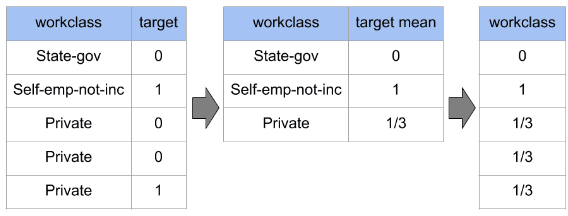

In [20]:
Image("local/imgs/target_encoding.png", width = 1000, height = 700)

### **Codificación del peso de la evidencia (WOE)**


La codificación del peso de la evidencia es similar a la codificación de destino, pero tiene en cuenta la distribución de la variable de destino para cada categoría. El WOE de una categoría se calcula como el logaritmo de la relación entre la media del objetivo para la categoría y la media de toda la población.

### **Feature Engineering para datos categóricos**

El Feature Engineering es un paso importante en la preparación de datos para modelos de aprendizaje automático. Implica la creación de nuevas funciones a partir de las existentes para mejorar el rendimiento de los modelos. A continuación se muestran algunas formas de realizar ingeniería de funciones en datos categóricos:

**Creando variables de interacción**

Las variables de interacción son características nuevas creadas al combinar dos o más características existentes. Por ejemplo, si tenemos dos características categóricas, 'Género' y 'Estado civil', podemos crear una nueva característica, 'Género-Estado civil', para capturar la interacción entre las dos características. Esto puede ayudar a capturar relaciones no lineales entre las características y la variable objetivo.

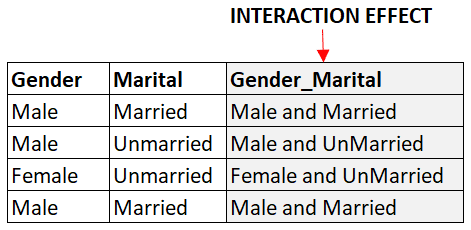

In [21]:
Image("local/imgs/interaction_effect.png", width = 800, height = 500)

### **Agrupación de variables numéricas**

Binning es el proceso de dividir variables numéricas continuas en bins discretos. Esto puede ayudar a reducir la cantidad de valores únicos en la característica, lo que puede resultar beneficioso para codificar datos categóricos. La agrupación también puede ayudar a capturar relaciones no lineales entre las características y la variable de destino.

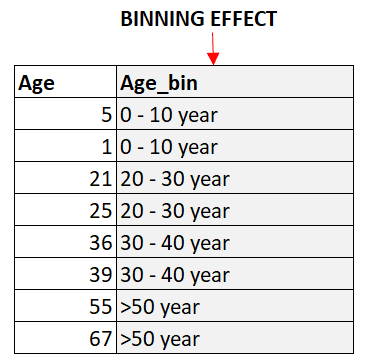

In [22]:
Image("local/imgs/binning_effect.png", width = 800, height = 500)

### **Encoding cyclical variables**

Las variables cíclicas son variables que se repiten durante un período específico. Por ejemplo, la hora del día es una variable cíclica ya que se repite cada 24 horas. Codificar variables cíclicas puede ayudar a capturar los patrones periódicos en los datos. Un enfoque común para codificar variables cíclicas es crear dos características nuevas, una que represente el seno de la variable y la otra que represente el coseno de la variable.

### **Conclusión**

El manejo de datos categóricos es un aspecto importante de muchos proyectos de aprendizaje automático. Hemos explorado varias técnicas para analizar y codificar variables categóricas en Python, incluida la codificación one-hot y label, que son dos técnicas comúnmente utilizadas.

Comenzamos presentando el concepto de datos categóricos y por qué es importante manejarlos adecuadamente en los modelos de aprendizaje automático. Luego proporcionamos una guía paso a paso sobre cómo realizar codificación one-hot usando pandas y scikit-learn, junto con ejemplos de código para ilustrar el proceso.